<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_practico_7_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 7 - AM

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

##Obtengo y muestro los datos y sus caracteristicas
Tambien elimino las columnas en las que tengo datos NAN

In [34]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news = true_news.dropna()
true_news.reset_index(drop=True, inplace=True)
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

#elimino algunas columnas para mejorar el rendimiento
#del true_news['CRIM']
#del true_news['ZN']
#del true_news['INDUS']
#del true_news['CHAS']
del true_news['NOX']
#del true_news['RM']
#del true_news['AGE']
del true_news['DIS']
#del true_news['RAD']
#del true_news['TAX']
del true_news['PTRATIO']
del true_news['B']
#del true_news['LSTAT']

true_news.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,TAX,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,6.280015,68.932741,9.403553,406.431472,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.697985,27.888705,8.633451,168.312419,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.000000,187.000000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,5.879250,45.475000,4.000000,280.250000,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,6.201500,77.700000,5.000000,330.000000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,6.605500,94.250000,24.000000,666.000000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,24.000000,711.000000,37.970000,50.000000


In [35]:
true_news

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,TAX,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,1,296,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,2,242,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,2,242,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,3,222,2.94,33.4
4,0.02985,0.0,2.18,0.0,6.430,58.7,3,222,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,5.569,73.5,6,391,15.10,17.5
390,0.22438,0.0,9.69,0.0,6.027,79.7,6,391,14.33,16.8
391,0.04527,0.0,11.93,0.0,6.120,76.7,1,273,9.08,20.6
392,0.06076,0.0,11.93,0.0,6.976,91.0,1,273,5.64,23.9


##Obtengo el target y los parámetros

In [36]:
y = true_news['MEDV']
X = true_news.copy()
del X['MEDV']
#Estandarizo los parámetros
Sc = StandardScaler()
X_norm = Sc.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=X.columns)
#Divido el dataset para luego comparar el rendimiento de los métodos de reducción de dimención
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=1)


##Utilizando Principal component analysis (PCA) y obtengo las 14 columnas de datos originales expresadas en dos columnas

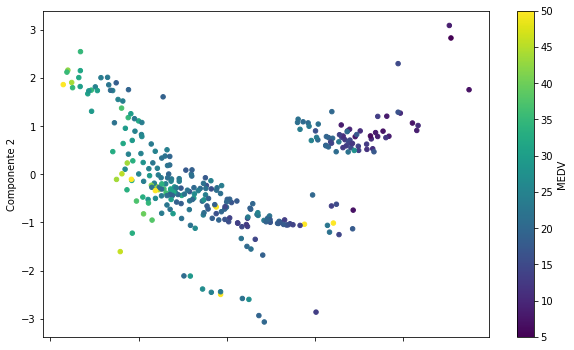

In [37]:
pca = PCA(n_components=2) #Realizo una reducción de dimención de 14 a 2
X_PCA_transform = pd.DataFrame(pca.fit_transform(X_train),columns={'Componente 1','Componente 2'})
X_PCA_transform['MEDV'] = y_train.values
X_PCA_transform.plot.scatter(x='Componente 1',y='Componente 2',c='MEDV',colormap='viridis',figsize=(10,6));

Se redujo a dos dimenciones la información total y se puede ver como se agrupan los valores mas altos de las casas y los mas bajos. hay bastante sesgo en el medio el gráfico por la reducción de dimencionalidad.

##Utilizando Latent Dirichlet Allocation (LDA)

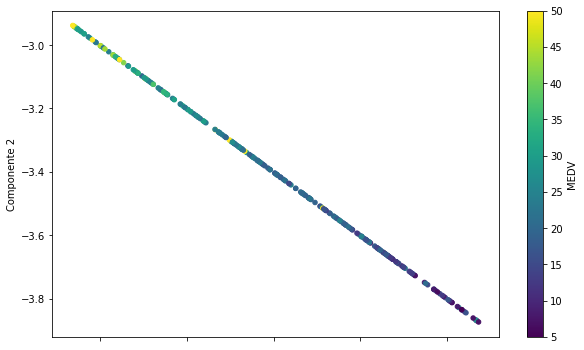

In [38]:
lda = LatentDirichletAllocation(n_components=2)
#LDA no puede tener valores negativos, pruebo el rendimiento desplzando los valores antes de entrenar
X_train_shift = pd.DataFrame()
shift = 0
for columna in X_train: #Obtengo el valor mas bajo de toda la
    if (min(X_train[columna])<shift):
        shift = min(X_train[columna])

for columna in X_train:
    values = []
    oldValues = X_train[columna].values
    for i in range(X_train.shape[0]):
        values.append(oldValues[i] - shift)
    X_train_shift[columna] = values

#Hago la transformación
X_LDA_transform_shift = pd.DataFrame(lda.fit_transform(X_train_shift),columns={'Componente 1','Componente 2'})
X_LDA_transform = pd.DataFrame()
#Hago el Shift de valores nuevamente
for columna in X_LDA_transform_shift:
    values = []
    oldValues = X_LDA_transform_shift[columna].values
    for i in range(X_LDA_transform_shift.shape[0]):
        values.append(oldValues[i] + shift)
    X_LDA_transform[columna] = values

X_LDA_transform['MEDV'] = y_train.values
X_LDA_transform.plot.scatter(x='Componente 1',y='Componente 2',c='MEDV',colormap='viridis',figsize=(10,6));

Se pueden observar los grupos sobre la recta dando los valores mayores de la componente 2 y menor componente 1 como las casas mas caras y viceversa.

##Por último pruebo con Non-Negative Matrix Factorization (NMF).

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


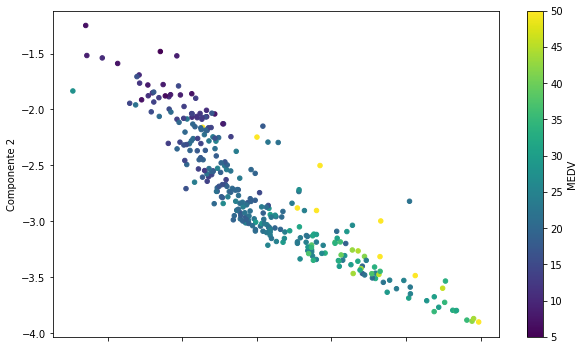

In [39]:
nmf = NMF(n_components=2,init='random')
# Al igual que LDA no se pueden ingresar valores negativos, utilizo el mismo método
#Hago la transformación
X_NMF_transform_shift = pd.DataFrame(nmf.fit_transform(X_train_shift),columns={'Componente 1','Componente 2'})
X_NMF_transform = pd.DataFrame()
#Hago el Shift de valores nuevamente
for columna in X_NMF_transform_shift:
    values = []
    oldValues = X_NMF_transform_shift[columna].values
    for i in range(X_NMF_transform_shift.shape[0]):
        values.append(oldValues[i] + shift)
    X_NMF_transform[columna] = values

X_NMF_transform['MEDV'] = y_train.values
X_NMF_transform.plot.scatter(x='Componente 1',y='Componente 2',c='MEDV',colormap='viridis',figsize=(10,6));

Se puede ver como las casas mas caras se juntan en los mayores valores de componente 1 y menor componente 2

## Los métodos LDA y NMF, lograron una mejor reducción que PCA, sin embargo los tres hicieron una reducción de dimencionalidad buena.